In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})
##########################

#df16_2 = pd.read_csv('model_files/student15_m062x_221001_3/kfold_0.csv')
#df16_3 = pd.read_csv('model_files/student15_m062x_221011_2/kfold_0.csv')

import glob

# Teacher
df1 = pd.read_csv('model_files/SSD_models/teacher/kfold_0.csv') # Exp
df1['AE'] = np.abs(df1.predicted - df1.DGsolv)
df1['SE'] = (df1.predicted - df1.DGsolv) ** 2.0

#### control ####
DFs_ctrl = [pd.read_csv(x) for x in sorted(glob.glob('model_files/control_models/student?_just_rs_dgsolv/kfold_0.csv')) + \
                               sorted(glob.glob('model_files/control_models/student??_just_rs_dgsolv/kfold_0.csv')) ]

##### SSD #####
DFs = [pd.read_csv('model_files/SSD_models/student'+str(x)+'/kfold_0.csv') for x in range(1,41) ]

for one_df in DFs:
    one_df['AE'] = np.abs(one_df.predicted - one_df.DGsolv)
    one_df['SE'] = (one_df.predicted - one_df.DGsolv) ** 2.0

In [4]:
print('%.3f' % df1[(df1['Train/Valid/Test'] == 'Train')].AE.mean(),
      '%.3f' % df1[(df1['Train/Valid/Test'] == 'Valid')].AE.mean(),
      '%.3f' % df1[(df1['Train/Valid/Test'] == 'Test')].AE.mean())

#for df in DFs_ctrl:
for df in DFs:
    print( [float('%.3f' % x) for x in [df[(df['Train/Valid/Test'] == 'Train') & (df.Exp_or_QM == 'Exp')].AE.mean(),
           df[(df['Train/Valid/Test'] == 'Valid') & (df.Exp_or_QM == 'Exp')].AE.mean(),
           df[(df['Train/Valid/Test'] == 'Test') & (df.Exp_or_QM == 'Exp')].AE.mean(),
           df[(df['Train/Valid/Test'] == 'Train') & (df.Exp_or_QM == 'QM')].AE.mean(),
           df[(df['Train/Valid/Test'] == 'Valid') & (df.Exp_or_QM == 'QM')].AE.mean(),
           df[(df['Train/Valid/Test'] == 'Test') & (df.Exp_or_QM == 'QM')].AE.mean()]]  )

0.064 0.258 0.271
[0.056, 0.242, 0.254, 0.038, 0.08, 0.081]
[0.065, 0.237, 0.245, 0.048, 0.085, 0.085]
[0.069, 0.234, 0.243, 0.055, 0.087, 0.087]
[0.074, 0.234, 0.234, 0.061, 0.09, 0.09]
[0.081, 0.232, 0.23, 0.067, 0.093, 0.092]
[0.061, 0.226, 0.233, 0.065, 0.091, 0.091]
[0.075, 0.211, 0.225, 0.073, 0.094, 0.094]
[0.078, 0.214, 0.221, 0.077, 0.096, 0.096]
[0.073, 0.221, 0.221, 0.083, 0.1, 0.099]
[0.077, 0.221, 0.221, 0.083, 0.098, 0.099]
[0.081, 0.217, 0.224, 0.087, 0.101, 0.101]
[0.081, 0.223, 0.226, 0.091, 0.103, 0.103]
[0.095, 0.224, 0.22, 0.096, 0.106, 0.106]
[0.092, 0.219, 0.222, 0.098, 0.109, 0.109]
[0.068, 0.225, 0.228, 0.094, 0.106, 0.106]
[0.089, 0.226, 0.229, 0.1, 0.11, 0.11]
[0.092, 0.221, 0.224, 0.105, 0.114, 0.114]
[0.097, 0.224, 0.228, 0.104, 0.114, 0.113]
[0.094, 0.227, 0.231, 0.11, 0.119, 0.118]
[0.099, 0.228, 0.232, 0.112, 0.121, 0.12]
[0.097, 0.222, 0.227, 0.121, 0.129, 0.129]
[0.102, 0.226, 0.232, 0.124, 0.131, 0.131]
[0.101, 0.223, 0.239, 0.121, 0.129, 0.129]
[0.106

In [5]:
print('%.3f' % np.sqrt(df1[(df1['Train/Valid/Test'] == 'Train')].SE.mean()),
      '%.3f' % np.sqrt(df1[(df1['Train/Valid/Test'] == 'Valid')].SE.mean()),
      '%.3f' % np.sqrt(df1[(df1['Train/Valid/Test'] == 'Test')].SE.mean()))

#for df in DFs_ctrl:
for df in DFs:
    print( [float('%.4f' % x) for x in [ np.sqrt(df[(df['Train/Valid/Test'] == 'Train') & (df.Exp_or_QM == 'Exp')].SE.mean()) ,
           np.sqrt(df[(df['Train/Valid/Test'] == 'Valid') & (df.Exp_or_QM == 'Exp')].SE.mean()),
           np.sqrt(df[(df['Train/Valid/Test'] == 'Test') & (df.Exp_or_QM == 'Exp')].SE.mean()),
           np.sqrt(df[(df['Train/Valid/Test'] == 'Train') & (df.Exp_or_QM == 'QM')].SE.mean()),
           np.sqrt(df[(df['Train/Valid/Test'] == 'Valid') & (df.Exp_or_QM == 'QM')].SE.mean()),
           np.sqrt(df[(df['Train/Valid/Test'] == 'Test') & (df.Exp_or_QM == 'QM')].SE.mean())]]  )

0.143 0.556 0.660
[0.1236, 0.5301, 0.657, 0.0515, 0.121, 0.1212]
[0.1428, 0.5322, 0.5941, 0.0657, 0.127, 0.1257]
[0.1473, 0.502, 0.5985, 0.0763, 0.1321, 0.1283]
[0.155, 0.498, 0.5958, 0.0855, 0.1344, 0.1327]
[0.1647, 0.4978, 0.5677, 0.0935, 0.137, 0.1346]
[0.1459, 0.5061, 0.6112, 0.0929, 0.1371, 0.1357]
[0.1581, 0.4549, 0.5679, 0.1037, 0.1385, 0.1393]
[0.1622, 0.4627, 0.5438, 0.1117, 0.1426, 0.1412]
[0.1517, 0.4883, 0.5605, 0.1213, 0.148, 0.1462]
[0.1631, 0.5078, 0.5487, 0.1227, 0.1471, 0.1464]
[0.1702, 0.4622, 0.5806, 0.128, 0.1492, 0.1488]
[0.1736, 0.5286, 0.5858, 0.1343, 0.1535, 0.1538]
[0.187, 0.4962, 0.5526, 0.1394, 0.1571, 0.1568]
[0.1798, 0.4924, 0.5657, 0.1445, 0.1622, 0.1596]
[0.157, 0.5079, 0.5936, 0.1362, 0.1549, 0.1537]
[0.1772, 0.4861, 0.5797, 0.1434, 0.1594, 0.1586]
[0.1868, 0.49, 0.5629, 0.1497, 0.1655, 0.1631]
[0.1889, 0.4854, 0.578, 0.1482, 0.1649, 0.1609]
[0.1868, 0.5067, 0.5598, 0.155, 0.1691, 0.168]
[0.1957, 0.5052, 0.556, 0.1578, 0.173, 0.1703]
[0.1931, 0.4766, 0.5

In [6]:
len(DFs)

40

In [8]:
for one_df in DFs_ctrl:
    one_df['AE'] = np.abs(one_df.predicted - one_df.DGsolv)
    one_df['SE'] = (one_df.predicted - one_df.DGsolv) ** 2.0

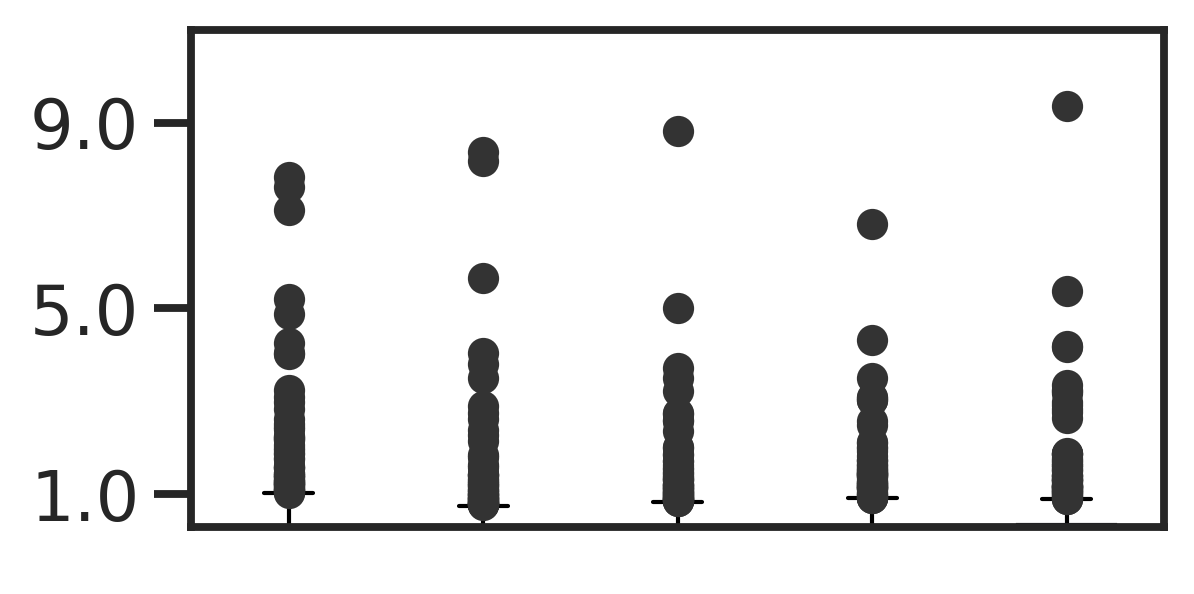

In [9]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(4.5,2.5))
ax = fig.add_subplot(111)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

df_stud13, df_stud29, df_stud35, df_ctrl35 = DFs[12], DFs[28], DFs[34], DFs_ctrl[34]



plot_target = [
              df1[(df1['Train/Valid/Test'] == 'Test') & (df1.Exp_or_QM == 'Exp')].AE,
              df_stud13[(df_stud13['Train/Valid/Test'] == 'Test') & (df_stud13.Exp_or_QM == 'Exp')].AE,
              df_stud29[(df_stud29['Train/Valid/Test'] == 'Test') & (df_stud29.Exp_or_QM == 'Exp')].AE,
              df_stud35[(df_stud35['Train/Valid/Test'] == 'Test') & (df_stud35.Exp_or_QM == 'Exp')].AE,
              df_ctrl35[(df_ctrl35['Train/Valid/Test'] == 'Test') & (df_ctrl35.Exp_or_QM == 'Exp')].AE
              ]

ax.boxplot(plot_target, widths = 0.5, 
           patch_artist = True, showmeans = True, 
           meanline = True, 
           bootstrap = 1000, notch = False, labels = [0,13,29,35,36], 
           whis = (0,95),
           medianprops = {'color': 'blue', 'linestyle': '--'}, meanprops = {'color':'blue', 'linestyle': '-'},
           flierprops = {'marker': '.', 'markersize': 15, 'markerfacecolor':'#333333', 'markeredgecolor':'none'},
           boxprops = {'facecolor': 'Teal'})
ax.set_xticks([])
ax.set_xlabel('')
#ax.set_ylabel('| Predicted - Exp |')
ax.set_xlim([0.5,5.5])
ax.set_ylim([.3,11])
ax.set_yticks([1.0,5.0,9.0])
plt.tight_layout()

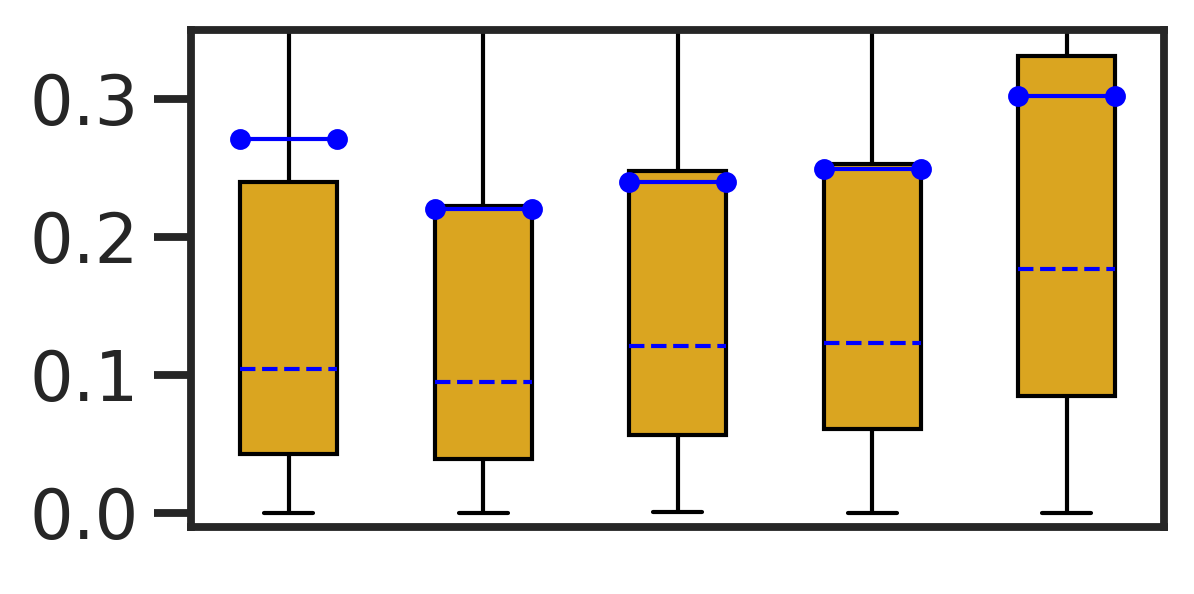

In [10]:
fig = plt.figure(figsize=(4.5,2.5))
ax = fig.add_subplot(111)

ax.boxplot(plot_target, widths = 0.5, 
           patch_artist = True, showmeans = True, 
           meanline = True, 
           bootstrap = 1000, notch = False, labels = [0,13,29,35,36], 
           whis = (0,95),
           medianprops = {'color': 'blue', 'linestyle': '--'}, meanprops = {'color':'blue', 'linestyle':'-', 'marker':'o', 'markersize':4, 'markerfacecolor':'blue', 'markeredgecolor':'blue'},
           flierprops = {'marker': '.', 'markersize': 7, 'markerfacecolor':'#AAAAAA', 'markeredgecolor':'none'},
           boxprops = {'facecolor': 'goldenrod'})
ax.set_xticks([])
ax.set_yticks([0.0,0.1,0.2,0.3])
ax.set_xlabel('')
#ax.set_ylabel('| Predicted - Measured |')
ax.set_xlim([0.5,5.5])
ax.set_ylim([-.01,.35])
#ax.set_ylim([-.01,1.1])
plt.tight_layout()